## Image Classification Using mnist fashion database


Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

Link : https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles


The class labels are:


Label 	    Description


0 	          T-shirt/top


1 	           Trouser


2 	           Pullover


3 	           Dress


4 	            Coat


5 	            Sandal


6 	            Shirt


7 	            Sneaker


8 	            Bag


9 	            Ankle boot

In [63]:
import tensorflow as tf
from tensorflow import keras

In [64]:
import keras

In [65]:
print(keras.__version__)

2.13.1


In [66]:
tf.__version__

'2.13.0'

In [67]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [68]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

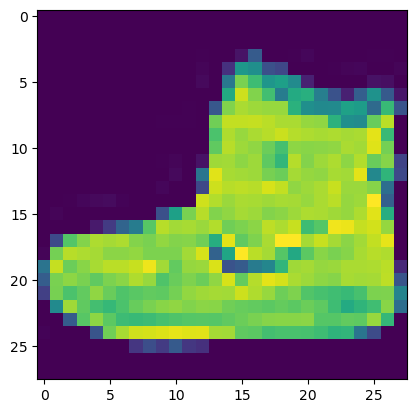

In [69]:
plt.imshow(X_train_full[0])  # access the first element/image

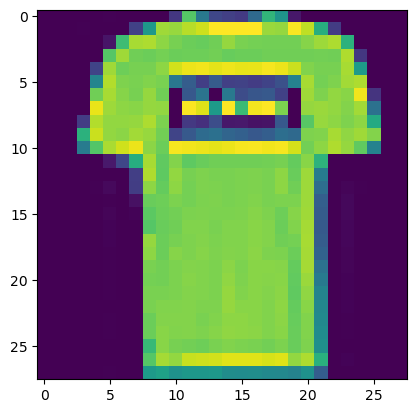

In [70]:
plt.imshow(X_train_full[1])

In [71]:
y_train_full[0]  # the label

9

In [72]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [73]:
class_names[y_train_full[10]]

'T-shirt/top'

In [74]:
X_train_full[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

 ### Data Normalization

 Normalize the data dimensions so that they are approximately of the same scale.
 
 

In [75]:
# restrict  the pixel intensities between 0 and 1
X_train_norm = X_train_full/255.
X_test_norm = X_test /255.

### Train/validation/test data split

In [76]:
X_valid, X_train = X_train_norm[:5000], X_train_norm[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_norm

In [77]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Building the Neural Network Structure Using Keras

In [78]:
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
# import image module
from IPython.display import Image
# get the image
Image(url="neural_network.png", width=500, height=300)

In [80]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28])) 
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


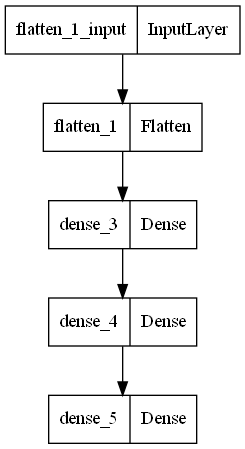

In [82]:
import pydot
keras.utils.plot_model(model)

In [83]:
# access the parameters

weight, biases = model.layers[1].get_weights()

In [84]:
weight

array([[ 0.04604758,  0.04037442, -0.02687095, ..., -0.05429857,
         0.07103196, -0.02824564],
       [ 0.02287435, -0.00332336, -0.0151726 , ...,  0.00032861,
         0.03178542, -0.06900272],
       [-0.01048492, -0.01133043, -0.06169538, ...,  0.07137483,
         0.04131084, -0.02754499],
       ...,
       [-0.06695804,  0.0332906 ,  0.05792956, ..., -0.00652812,
        -0.00115028,  0.00454901],
       [-0.04695086,  0.05250371,  0.02110173, ..., -0.02244688,
        -0.07160587,  0.06867261],
       [-0.04478113,  0.05692831,  0.02028076, ..., -0.06229531,
         0.04383554, -0.05985114]], dtype=float32)

In [85]:
weight.shape

(784, 300)

In [86]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Setting up learning processes using compile method.

In [87]:
model.compile(loss ="sparse_categorical_crossentropy",
              optimizer= "sgd",
              metrics=["accuracy"])

In [88]:
model_history = model.fit(X_train, y_train, epochs=30,
                          validation_data =(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7153 - accuracy: 0.7667 - val_loss: 0.5167 - val_accuracy: 0.8212
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4865 - accuracy: 0.8283 - val_loss: 0.4353 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8426 - val_loss: 0.5304 - val_accuracy: 0.7986
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4157 - accuracy: 0.8539 - val_loss: 0.3930 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3970 - accuracy: 0.8597 - val_loss: 0.3769 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3779 - accuracy: 0.8654 - val_loss: 0.3754 - val_accuracy: 0.8706
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3658 - accuracy: 0.8699 - val_loss: 0.3627 - val_accuracy:

In [89]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [90]:
model_history.history

{'loss': [0.7152553796768188,
  0.48653388023376465,
  0.442454069852829,
  0.4156529903411865,
  0.39704442024230957,
  0.3779352903366089,
  0.3658323287963867,
  0.3535994589328766,
  0.34330660104751587,
  0.333402156829834,
  0.32498836517333984,
  0.31565162539482117,
  0.30884286761283875,
  0.302503764629364,
  0.2944793105125427,
  0.2893500030040741,
  0.2839869558811188,
  0.2773273289203644,
  0.2727789878845215,
  0.26728764176368713,
  0.2621757686138153,
  0.2567945122718811,
  0.25283920764923096,
  0.24874216318130493,
  0.24433687329292297,
  0.2404537796974182,
  0.23659612238407135,
  0.23306161165237427,
  0.22871699929237366,
  0.22510921955108643],
 'accuracy': [0.7666727304458618,
  0.8282908797264099,
  0.8425818085670471,
  0.8539090752601624,
  0.859745442867279,
  0.8653636574745178,
  0.8699091076850891,
  0.8734727501869202,
  0.8773999810218811,
  0.8809818029403687,
  0.8840727210044861,
  0.8868727087974548,
  0.889054536819458,
  0.8912363648414612,
  

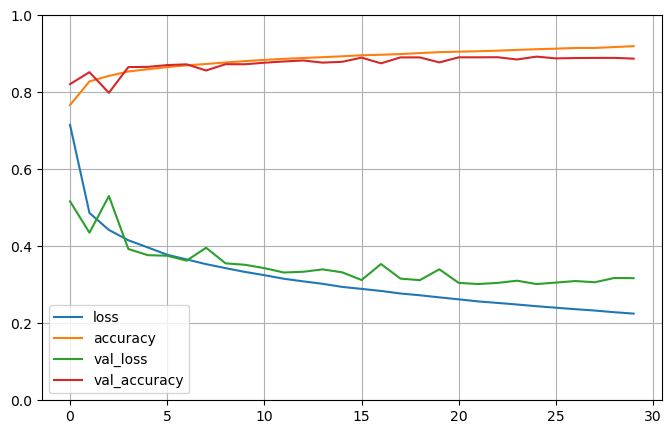

In [91]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Evaluate model performance

In [92]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3456 - accuracy: 0.8791


[0.34562012553215027, 0.8791000247001648]

In [93]:
# testing on a new dataset
X_new = X_test[:3]

Predict the probabilities and classes on new unseen data

In [99]:
# Get predicted probabilities for each class
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 34ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [101]:
 # Get the index of the class with the highest probability
 y_pred_classes = y_proba.argmax(axis=-1)
 # Now y_pred_classes contains the predicted classes for the new data
print(y_pred_classes)

[9 2 1]


In [103]:
np.array(class_names)[y_pred_classes]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(size=(28, 28))


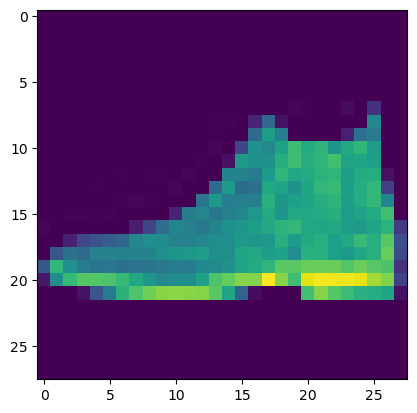

In [104]:
print(plt.imshow(X_test[0]))

AxesImage(size=(28, 28))


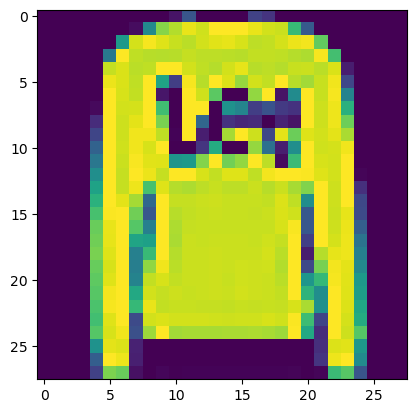

In [106]:
print(plt.imshow(X_test[1]))

AxesImage(size=(28, 28))


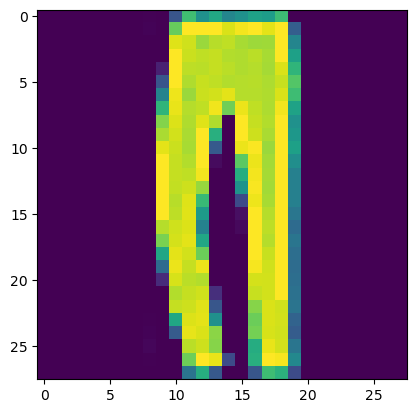

In [107]:
print(plt.imshow(X_test[2]))